# **Titanic Passenger Survival Prediction**

1.Problem Statement

During the Titanic disaster, passenger survival depended on several factors such as age, gender, and passenger class.
The goal of this project is to develop a binary classification machine learning model that predicts whether a passenger survived (Yes/No) using historical passenger data. The project also aims to identify the most important factors that influenced survival.

# **2.Objectives of Product**

* Understand passenger survival patterns
* Perform basic data preprocessing
* Conduct minimal but meaningful EDA
* Build binary classification models
* Evaluate model performance
* Identify key survival-influencing     features

# **3.Dataset Description**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import files
uploaded=files.upload()


Saving train.csv to train (1).csv


In [ ]:
import pandas as pd
df=pd.read_csv("train.csv")
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

# **4th Exploaraity Data Analyis**

## Graph 1: Survival Count Plot

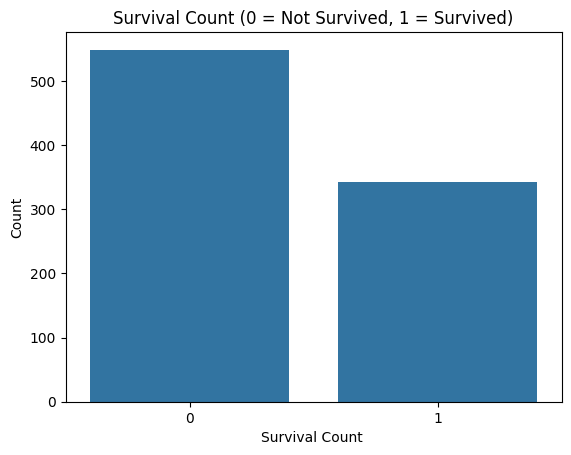

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = Not Survived, 1 = Survived)')
plt.xlabel("Survival Count ")
plt.ylabel("Count")
plt.show()

## Graph 2: Survival by Gender

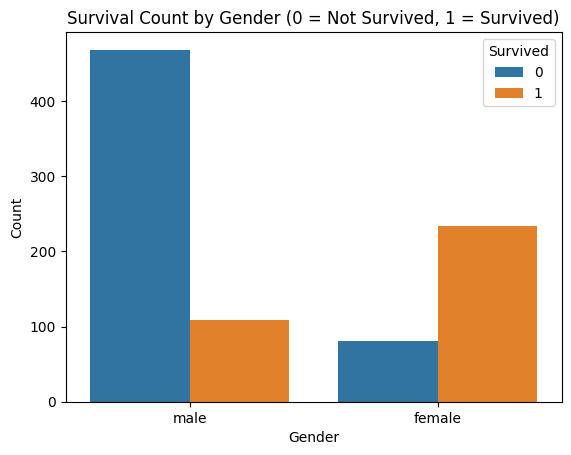

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Gender (0 = Not Survived, 1 = Survived)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## Graph 3: Survival by Passenger Class

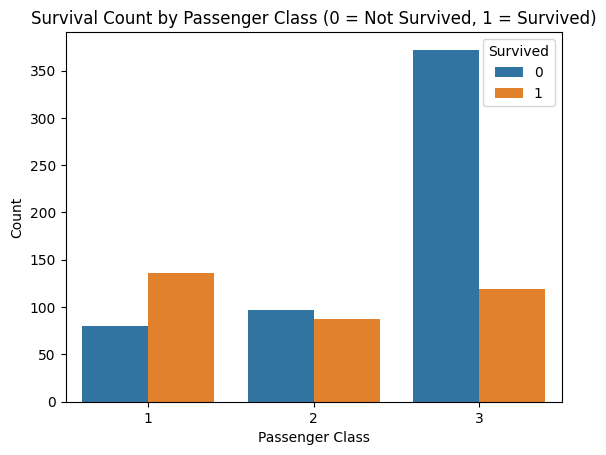

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Passenger Class (0 = Not Survived, 1 = Survived)')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

## Graph 4: Fare vs Survival

Text(0, 0.5, 'Fare')

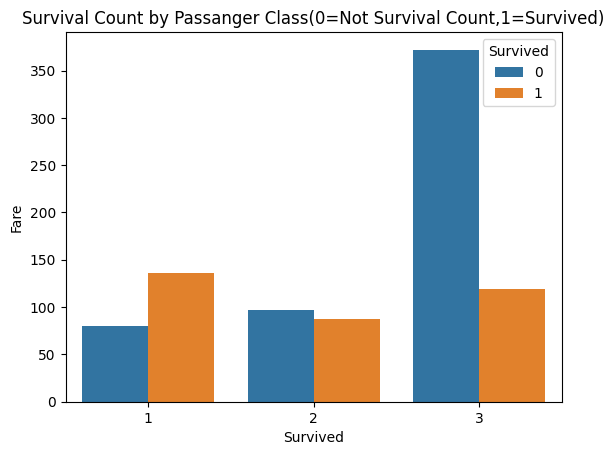

In [ ]:
sns.countplot(x='Pclass',hue="Survived",data=df)
plt.title('Survival Count by Passanger Class(0=Not Survival Count,1=Survived)')
plt.xlabel("Survived")
plt.ylabel("Fare")

# **5th Machine Learning Workflow**

In [ ]:
from google.colab import files
uploaded=files.upload()


Saving train.csv to train (2).csv


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
num_cols=["Age"]
for col in num_cols:
  df[col]=df[col].fillna(df[col].median())
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
cat_cols=["Embarked"]
for col in cat_cols:
  df[col]=df[col].fillna(df[col].mode()[0])
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.drop('Cabin',axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
df['Sex']=df['Sex'].map({"male":1,"female":0})
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
2                               Heikkinen, Miss. Laina    0  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
4                             Allen, Mr. William Henry    1  35.0      0   
..                                                 ...  ...   ...    ...   
886        

In [ ]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Embarked'] = le.fit_transform(df['Embarked'])


print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
2                               Heikkinen, Miss. Laina    0  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
4                             Allen, Mr. William Henry    1  35.0      0   
..                                                 ...  ...   ...    ...   
886        

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[['Age', 'Fare']] = scaler.fit_transform(df[['Age','Fare']])

In [ ]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)


In [ ]:
x=df.drop('Survived', axis=1)
y=df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=42
)

# **6th Models Used**

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

## Decision Tree

In [ ]:
model = DecisionTreeClassifier(criterion='gini',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

## Random Forest

In [ ]:
rf = RandomForestClassifier(
    n_estimators=125,
    bootstrap=True,
    random_state=42
)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=125, random_state=42)

# 7. Model Evaluation

## Graph 5: Confusion Matrix

In [ ]:
from sklearn.metrics import(confusion_matrix,accuracy_score,precision_score,recall_score,f1_score)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[96,  9],
       [27, 47]])

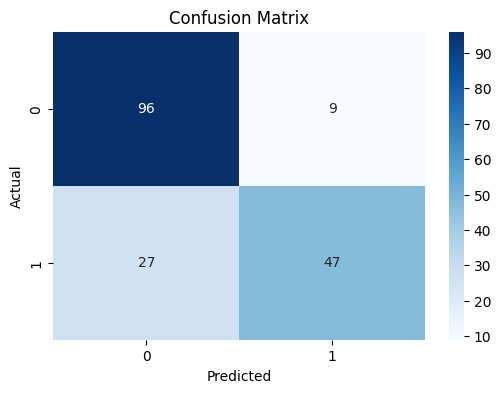

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Evalution Metrics

Accuracy

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7988826815642458

precision

In [ ]:
precision = precision_score(y_test, y_pred)
precision


0.8392857142857143

Recall

In [ ]:
recall = recall_score(y_test,y_pred)
recall

0.6351351351351351

F1-score

In [ ]:
f1 = f1_score(y_test, y_pred)
f1

0.7230769230769231

# 8. Identifying Survival-Influencing Factors

In [ ]:
importances = rf.feature_importances_
feature_names = x.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance':  importances
})

## Graph 6: Feature Importance (Random Forest)

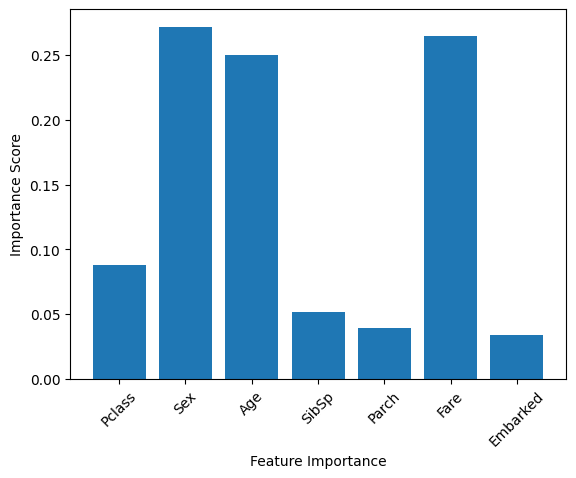

In [ ]:
plt.figure()
plt.bar(feature_names,importances)
plt.ylabel("Importance Score")
plt.xlabel("Feature Importance")
plt.xticks(rotation=45)
plt.show()